In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [111]:
#read data
data=pd.read_excel('transaction.xlsx')
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19993,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19994,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19995,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19997 non-null  int64         
 1   product_id               19997 non-null  int64         
 2   customer_id              19997 non-null  int64         
 3   transaction_date         19997 non-null  datetime64[ns]
 4   online_order             19637 non-null  float64       
 5   order_status             19997 non-null  object        
 6   brand                    19800 non-null  object        
 7   product_line             19800 non-null  object        
 8   product_class            19800 non-null  object        
 9   product_size             19800 non-null  object        
 10  list_price               19997 non-null  float64       
 11  standard_cost            19800 non-null  float64       
 12  product_first_sold_date  19800 n

In [113]:
data.isnull().sum().sort_values(ascending = False)

Unnamed: 13                19997
Unnamed: 14                19997
Unnamed: 24                19997
Unnamed: 23                19997
Unnamed: 22                19997
Unnamed: 21                19997
Unnamed: 20                19997
Unnamed: 19                19997
Unnamed: 18                19997
Unnamed: 17                19997
Unnamed: 16                19997
Unnamed: 15                19997
Unnamed: 25                19997
online_order                 360
product_first_sold_date      197
standard_cost                197
product_size                 197
product_class                197
product_line                 197
brand                        197
product_id                     0
list_price                     0
order_status                   0
transaction_date               0
customer_id                    0
transaction_id                 0
dtype: int64

In [114]:
data.dropna(subset=['online_order','product_first_sold_date', 'standard_cost', 'product_size','product_class','product_line','brand'],axis=0,inplace=True)

In [115]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
data.to_csv('transaction2.csv')

In [117]:
data.describe(include='all')

<ipython-input-117-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,19442.000000,19442.000000,19442.000000,19442,19442.000000,19442,19442,19442,19442,19442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-08-18 00:00:00,NaN,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,81,NaN,19270,4168,13919,13584,12764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9988.593355,45.804804,1738.958903,NaN,0.500926,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5779.658271,30.569061,1011.139208,NaN,0.500012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4975.250000,18.000000,857.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [119]:
#take_overview about data
import ydata_profiling as pp
pp.ProfileReport(dfresult)

NameError: name 'dfresult' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
data.isnull().sum().sort_values(ascending = False)

Unnamed: 13                20000
Unnamed: 14                20000
Unnamed: 24                20000
Unnamed: 23                20000
Unnamed: 22                20000
Unnamed: 21                20000
Unnamed: 20                20000
Unnamed: 19                20000
Unnamed: 18                20000
Unnamed: 17                20000
Unnamed: 16                20000
Unnamed: 15                20000
Unnamed: 25                20000
online_order                 360
product_first_sold_date      197
standard_cost                197
product_size                 197
product_class                197
product_line                 197
brand                        197
product_id                     0
list_price                     0
order_status                   0
transaction_date               0
customer_id                    0
transaction_id                 0
dtype: int64

In [ ]:
#read data
data=pd.read_excel('customer_demographic.xlsx')
data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
data.isnull().sum().sort_values(ascending = False)

job_industry_category                  656
job_title                              506
default                                302
last_name                              125
DOB                                     87
tenure                                  87
customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
dtype: int64

In [ ]:
data.dropna(subset=['job_industry_category','job_title', 'default', 'last_name','DOB','tenure'],axis=0,inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending = False)

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [ ]:
data.to_csv('customer_demo2.csv')

In [ ]:
data.loc[data["gender"] == "M", "gender"] = 'Male'


In [ ]:
data.loc[data["gender"] == "F", "gender"] = 'Female'


In [ ]:
data.loc[data["gender"] == "U", "gender"] = 'Unknown'


In [ ]:
data.to_csv('customer_demo3.csv')


In [ ]:
#take_overview about data
import ydata_profiling as pp
pp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


In [ ]:
#read data
data=pd.read_excel('customer_address.xlsx')
data

,customer_id,address,postcode,state,country,property_valuation
0,3999,1482 Hauk Trail,3064,VIC,Australia,3
1,3998,736 Roxbury Junction,2540,NSW,Australia,6
2,3997,4 Dovetail Crossing,2350,NSW,Australia,2
3,3996,0 Transport Center,3977,VIC,Australia,6
4,3995,613 Erie Lane,2088,NSW,Australia,12
...,...,...,...,...,...,...
3990,6,9 Oakridge Court,3216,VIC,Australia,9
3991,5,17979 Del Mar Point,2448,New South Wales,Australia,4
3992,4,0 Holy Cross Court,4211,QLD,Australia,9
3993,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [ ]:
#take_overview about data
import ydata_profiling as pp
pp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


In [ ]:
data.loc[data["state"] == "Victoia", "state"] = 'VIC'
data.loc[data["state"] == "New South Wales", "state"] = 'NSW'



In [ ]:
data.to_csv('customer_address1.csv')


In [ ]:
df1=pd.read_csv('transaction2.csv')
df2=pd.read_csv('customer_demo3.csv')
df3=pd.read_csv('customer_address1.csv')

In [ ]:
dataFrame=pd.merge(df3,df2,on='customer_id')

In [ ]:
dataFrame.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,10/12/1953,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,Eli,Bockman,Male,81,12/16/1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,9,97736 7th Trail,2023,NSW,Australia,12,Mala,Lind,Female,97,3/10/1973,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8
3,12,44339 Golden Leaf Alley,4557,QLD,Australia,4,Sawyere,Flattman,Male,58,7/21/1994,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8
4,13,2 Sutherland Street,3799,VIC,Australia,6,Gabriele,Norcross,Male,38,2/15/1955,Developer I,Financial Services,High Net Worth,N,Yes,8


In [ ]:
dataFrame.to_csv('dataFrame.csv')


In [ ]:
df=pd.merge(dataFrame,df1,on='customer_id')

In [ ]:
df.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,profit
0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,94,86,12/23/2017,0,Approved,OHM Cycles,Standard,medium,medium,110.56
1,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,3765,38,4/6/2017,1,Approved,Solex,Standard,medium,medium,751.02
2,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,5157,47,5/11/2017,1,Approved,Trek Bicycles,Road,low,small,189.28
3,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,9785,72,1/5/2017,0,Approved,Norco Bicycles,Standard,medium,medium,90.10
4,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93,...,13424,2,2/21/2017,0,Approved,Solex,Standard,medium,medium,17.87


In [ ]:
df.to_csv('df.csv')


In [189]:
df=pd.read_csv('df.csv')


In [207]:
type(df['transaction_date'])

pandas.core.series.Series

In [208]:
df['new_date']=df['transaction_date'].astype('datetime64[D]')


In [209]:
df['new_date']

0       2017-12-23
1       2017-04-06
2       2017-05-11
3       2017-01-05
4       2017-02-21
           ...    
12965   2017-03-07
12966   2017-04-02
12967   2017-11-08
12968   2017-09-01
12969   2017-09-12
Name: new_date, Length: 12970, dtype: datetime64[ns]

In [210]:
df.to_csv('df50.csv')


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          12970 non-null  int64  
 1   address                              12970 non-null  object 
 2   postcode                             12970 non-null  int64  
 3   state                                12970 non-null  object 
 4   country                              12970 non-null  object 
 5   property_valuation                   12970 non-null  int64  
 6   first_name                           12970 non-null  object 
 7   last_name                            12970 non-null  object 
 8   gender                               12970 non-null  object 
 9   past_3_years_bike_related_purchases  12970 non-null  int64  
 10  age                                  12970 non-null  int64  
 11  profit                      

In [ ]:
df['total_profit'] = df.groupby('customer_id')['transaction_id'].count()


In [200]:
dd= df.groupby('customer_id')['transaction_date'].max()


In [211]:
grouped_df = df.groupby('customer_id')['new_date'].max()

print(grouped_df)

customer_id
1      2017-12-23
2      2017-08-24
9      2017-10-13
12     2017-10-24
13     2017-12-03
          ...    
3493   2017-09-28
3494   2017-12-26
3495   2017-12-17
3496   2017-04-18
3497   2017-11-08
Name: new_date, Length: 2327, dtype: datetime64[ns]


In [225]:
import datetime

today = datetime.datetime.now()

grouped_df['days_since_last_transaction'] = (today- df['new_date'])

ss=grouped_df['days_since_last_transaction'] 
ss

0       2074 days 03:31:28.902218
1       2335 days 03:31:28.902218
2       2300 days 03:31:28.902218
3       2426 days 03:31:28.902218
4       2379 days 03:31:28.902218
                   ...           
12965   2365 days 03:31:28.902218
12966   2339 days 03:31:28.902218
12967   2119 days 03:31:28.902218
12968   2187 days 03:31:28.902218
12969   2176 days 03:31:28.902218
Name: new_date, Length: 12970, dtype: timedelta64[ns]

In [226]:
ss.to_csv('df103.csv')


In [201]:
dd.head()

customer_id
1     9-Dec-2017
2     4-May-2017
9     6-Mar-2017
12    4-Sep-2017
13    6-Jan-2017
Name: transaction_date, dtype: object

In [ ]:
df.to_csv('df2.csv')


In [125]:
grouped_df = df.groupby(['customer_id', 'address','postcode','state','country','property_valuation','first_name','last_name','gender','age','job_title','job_industry_category','wealth_segment','past_3_years_bike_related_purchases','owns_car','deceased_indicator'])['profit'].sum()
grouped_df

customer_id  address                  postcode  state  country    property_valuation  first_name   last_name  gender  age  job_title                             job_industry_category  wealth_segment     past_3_years_bike_related_purchases  owns_car  deceased_indicator
1            060 Morning Avenue       2016      NSW    Australia  10                  Laraine      Medendorp  Female  69   Executive Secretary                   Health                 Mass Customer      93                                   Yes       N                     3018
2            6 Meadow Vale Court      2153      NSW    Australia  10                  Eli          Bockman    Male    42   Administrative Officer                Financial Services     Mass Customer      81                                   Yes       N                     2226
9            97736 7th Trail          2023      NSW    Australia  12                  Mala         Lind       Female  50   Business Systems Development Analyst  Argiculture     

In [127]:
grouped_df.to_csv('df4.csv')


In [170]:
df=pd.read_csv('df5.csv')


In [171]:
#here are some relations:
stores_date=df.groupby(by=['age'] , as_index=False)['profit'].mean()
stores_date.sort_values(by='profit', ascending=False)

,age,profit
53,91,7214.000000
49,70,5127.000000
51,80,4523.000000
20,41,3948.636364
45,66,3653.187500
7,28,3444.666667
17,38,3417.422222
34,55,3357.050000
11,32,3339.080000
38,59,3310.914894


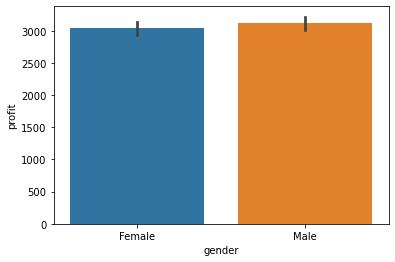

In [138]:
plots = sns.barplot(data = df, x = 'gender', y = 'profit')

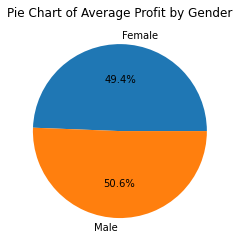

In [146]:
grouped_df = df.groupby('gender')['profit'].mean()

plt.pie(grouped_df.values, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Pie Chart of Average Profit by Gender')
plt.show()

In [150]:
df.loc[df["state"] == "Victoria", "state"] = 'VIC'


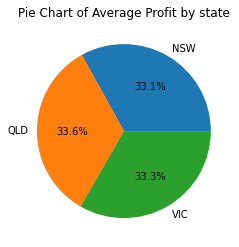

In [151]:
grouped_df = df.groupby('state')['profit'].mean()

plt.pie(grouped_df.values, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Pie Chart of Average Profit by state')
plt.show()

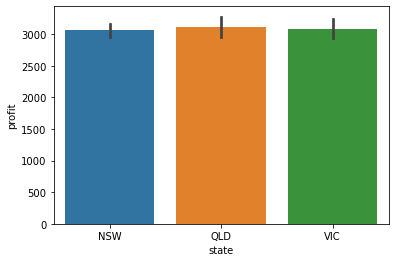

In [152]:
plots = sns.barplot(data = df, x = 'state', y = 'profit')

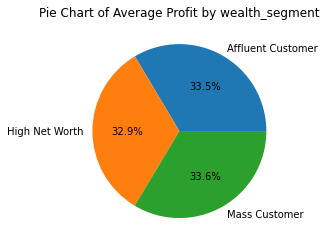

In [154]:
grouped_df = df.groupby('wealth_segment')['profit'].mean()

plt.pie(grouped_df.values, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Pie Chart of Average Profit by wealth_segment')
plt.show()

In [155]:
df.to_csv('df5.csv')


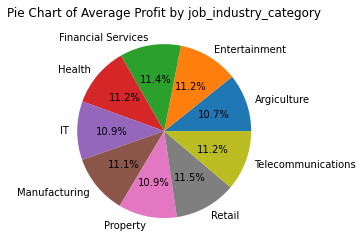

In [159]:

grouped_df = df.groupby('job_industry_category')['profit'].mean()

plt.pie(grouped_df.values, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Pie Chart of Average Profit by job_industry_category')
plt.show()

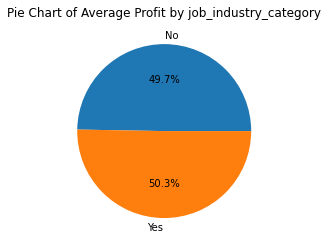

In [158]:
grouped_df = df.groupby('owns_car')['profit'].mean()

plt.pie(grouped_df.values, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Pie Chart of Average Profit by job_industry_category')
plt.show()

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. 
It groups the customers on the basis of their previous purchase transactions. 
It helps managers to identify potential customers to do more profitable business. 

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

Steps of RFM(Recency, Frequency, Monetary):

Calculate the Recency, Frequency, Monetary values for each customer.
Add segment bin values to RFM table using quartile.
Sort the customer RFM score in ascending order.

In [234]:
rfm=pd.read_csv('df5.csv')

Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [235]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])

In [236]:
rfm.head()



,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,age,...,past_3_years_bike_related_purchases,owns_car,last_transaction_date,deceased_indicator,Frequency,Monetary,Recency,r_quartile,f_quartile,m_quartile
0,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,69.0,...,93.0,Yes,12/23/2017,N,11.0,3018.0,4309.0,4,1,2
1,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,42.0,...,81.0,Yes,8/24/2017,N,3.0,2226.0,4297.0,1,4,3
2,9.0,97736 7th Trail,2023.0,NSW,Australia,12.0,Mala,Lind,Female,50.0,...,97.0,Yes,10/13/2017,N,6.0,2352.0,4302.0,2,2,3
3,12.0,44339 Golden Leaf Alley,4557.0,QLD,Australia,4.0,Sawyere,Flattman,Male,29.0,...,58.0,No,10/24/2017,N,7.0,3540.0,4303.0,2,2,2
4,13.0,2 Sutherland Street,3799.0,VIC,Australia,6.0,Gabriele,Norcross,Male,68.0,...,38.0,Yes,12/3/2017,N,7.0,4337.0,4307.0,3,2,1


we will concatente the results together

In [237]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()



,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,age,...,owns_car,last_transaction_date,deceased_indicator,Frequency,Monetary,Recency,r_quartile,f_quartile,m_quartile,RFM_Score
0,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,69.0,...,Yes,12/23/2017,N,11.0,3018.0,4309.0,4,1,2,412
1,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,42.0,...,Yes,8/24/2017,N,3.0,2226.0,4297.0,1,4,3,143
2,9.0,97736 7th Trail,2023.0,NSW,Australia,12.0,Mala,Lind,Female,50.0,...,Yes,10/13/2017,N,6.0,2352.0,4302.0,2,2,3,223
3,12.0,44339 Golden Leaf Alley,4557.0,QLD,Australia,4.0,Sawyere,Flattman,Male,29.0,...,No,10/24/2017,N,7.0,3540.0,4303.0,2,2,2,222
4,13.0,2 Sutherland Street,3799.0,VIC,Australia,6.0,Gabriele,Norcross,Male,68.0,...,Yes,12/3/2017,N,7.0,4337.0,4307.0,3,2,1,321


find the best:111

In [238]:
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary', ascending=False).head()



,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,age,...,owns_car,last_transaction_date,deceased_indicator,Frequency,Monetary,Recency,r_quartile,f_quartile,m_quartile,RFM_Score
339,473.0,29 South Point,3111.0,VIC,Australia,9.0,Benji,O'Shirine,Male,46.0,...,Yes,9/6/2017,N,9.0,8364.0,4298.0,1,1,1,111
1278,1887.0,72 Mandrake Court,3183.0,VIC,Australia,9.0,Kynthia,Purcer,Female,58.0,...,Yes,9/16/2017,N,10.0,8035.0,4299.0,1,1,1,111
402,565.0,5861 Browning Park,2065.0,NSW,Australia,8.0,Saleem,Meller,Male,63.0,...,Yes,9/17/2017,N,10.0,7078.0,4299.0,1,1,1,111
705,1043.0,91 Spohn Plaza,4573.0,QLD,Australia,7.0,Giorgi,Hurford,Male,36.0,...,Yes,7/29/2017,N,8.0,6935.0,4294.0,1,1,1,111
2192,3280.0,9 Hallows Circle,2113.0,NSW,Australia,11.0,Micki,McNamara,Female,36.0,...,Yes,8/18/2017,N,8.0,6881.0,4296.0,1,1,1,111


In [239]:
def the_best(x):
    if (x['RFM_Score'] in ['111','112','121','211','122','212','221','222','311','312','321','322']): 
        return "Best"
    
    else: 
        return "Others"

In [241]:
rfmSeg = rfm
rfmSeg['R_label'] = rfmSeg.apply(the_best,axis=1)
rfmSeg

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,age,...,last_transaction_date,deceased_indicator,Frequency,Monetary,Recency,r_quartile,f_quartile,m_quartile,RFM_Score,R_label
0,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,69.0,...,12/23/2017,N,11.0,3018.0,4309.0,4,1,2,412,Others
1,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,42.0,...,8/24/2017,N,3.0,2226.0,4297.0,1,4,3,143,Others
2,9.0,97736 7th Trail,2023.0,NSW,Australia,12.0,Mala,Lind,Female,50.0,...,10/13/2017,N,6.0,2352.0,4302.0,2,2,3,223,Others
3,12.0,44339 Golden Leaf Alley,4557.0,QLD,Australia,4.0,Sawyere,Flattman,Male,29.0,...,10/24/2017,N,7.0,3540.0,4303.0,2,2,2,222,Best
4,13.0,2 Sutherland Street,3799.0,VIC,Australia,6.0,Gabriele,Norcross,Male,68.0,...,12/3/2017,N,7.0,4337.0,4307.0,3,2,1,321,Best
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
12966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
12967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
12968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others


In [242]:
rfmSeg.to_csv('last.csv')


In [323]:
df1=pd.read_csv('D:/intership-forage/task2/model_train_dataset.csv')


In [278]:
df1.head()

,state,property_valuation,gender,age,job_industry_category,wealth_segment,past_3_years_bike_related_purchases,owns_car,R_label
0,QLD,4,Male,29,Manufacturing,Mass Customer,58,No,Best
1,VIC,6,Male,68,Financial Services,High Net Worth,38,Yes,Best
2,NSW,10,Female,45,Argiculture,Mass Customer,55,Yes,Best
3,VIC,7,Male,44,Health,Mass Customer,37,Yes,Best
4,QLD,4,Male,49,Health,Affluent Customer,5,Yes,Best


In [324]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['state'] = labelencoder.fit_transform(df1['state'])



In [325]:
df1['gender'] = labelencoder.fit_transform(df1['gender'])
df1['job_industry_category'] = labelencoder.fit_transform(df1['job_industry_category'])
df1['wealth_segment'] = labelencoder.fit_transform(df1['wealth_segment'])
df1['past_3_years_bike_related_purchases'] = labelencoder.fit_transform(df1['past_3_years_bike_related_purchases'])
df1['owns_car'] = labelencoder.fit_transform(df1['owns_car'])
df1['R_label'] = labelencoder.fit_transform(df1['R_label'])



In [326]:
df1.head()

,state,property_valuation,gender,job_industry_category,wealth_segment,past_3_years_bike_related_purchases,owns_car,R_label
0,1,4,1,5,2,58,0,0
1,2,6,1,2,1,38,1,0
2,0,10,0,0,2,55,1,0
3,2,7,1,3,2,37,1,0
4,1,4,1,3,0,5,1,0


In [327]:
X=df1.drop(['R_label'],axis=1) #input
y=df1['R_label']  #output(label)

In [328]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
X=scaler.fit_transform(X)   

In [330]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [285]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


In [286]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5,15,20,21,25],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=10, verbose=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
0.7039244436777643
DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=0)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuracy: 0.6630901287553648


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


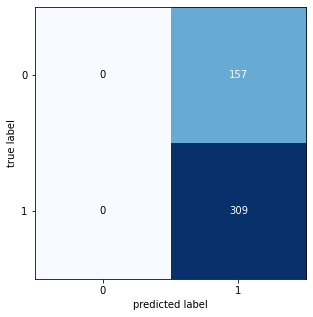

In [287]:
tree_clas =DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=0)
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('accuracy:',tree_clas.score(X_test, y_test))
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [331]:
#grid Search

rfc = RandomForestClassifier()
params = {'n_estimators': [3,10,30,100], 'criterion': ['gini', 'entropy'],'class_weight':[None, 'balanced', 'balanced_subsample']}
mysearch = GridSearchCV(rfc, params, cv=10,verbose=True)
mysearch.fit(X_train,y_train)
print(mysearch.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy')


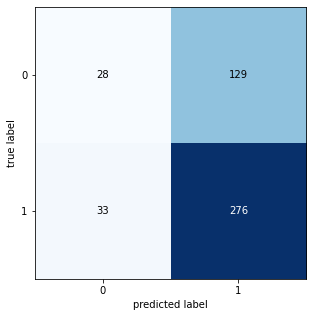

              precision    recall  f1-score   support

           0       0.46      0.18      0.26       157
           1       0.68      0.89      0.77       309

    accuracy                           0.65       466
   macro avg       0.57      0.54      0.51       466
weighted avg       0.61      0.65      0.60       466

accuracy: 0.6523605150214592


In [332]:
random_forest =RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy')


random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()      
print(classification_report(y_test, y_predict))
print('accuracy:',random_forest.score(X_test, y_test))

In [267]:
#Grid Search
svm_model =svm.SVC()
parameters = {'kernel':('linear', 'rbf'),'C':(1,2,5,10,11,15), 'gamma': (1, 0.1, 0.01)}
clf = GridSearchCV(svm_model, parameters, verbose=True,cv=5)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVC(C=1, gamma=1, kernel='linear')


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuracy: 0.6630901287553648


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


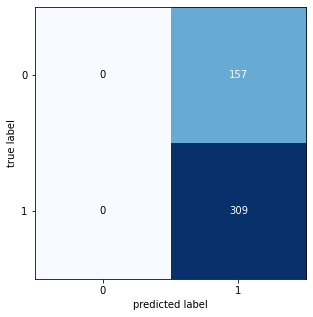

In [268]:
svm_model =svm.SVC(C=1, gamma=1, kernel='linear')
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',svm_model.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [269]:
ada_model= AdaBoostClassifier()
parameters = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]}
clf = GridSearchCV(ada_model, parameters, cv=10, verbose=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_estimator_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.7039244436777643
AdaBoostClassifier(n_estimators=1)


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuarcy: 0.6630901287553648


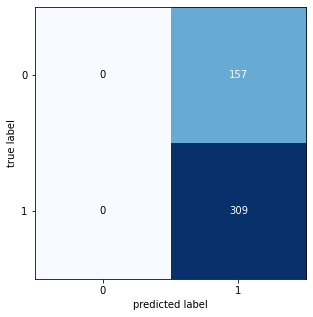

In [270]:
ada_model = AdaBoostClassifier(n_estimators=1)
ada_model.fit(X_train, y_train)
pred_ada_model= ada_model.predict(X_test)
print(classification_report(y_test, pred_ada_model))
print('accuarcy:',ada_model.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_ada_model)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [271]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7039234339415954
LogisticRegression(solver='newton-cg')


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuracy: 0.6630901287553648


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


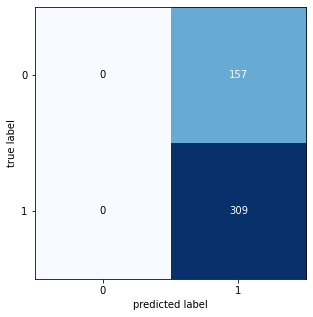

In [272]:
log_reg =LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',log_reg.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuracy: 0.6630901287553648


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


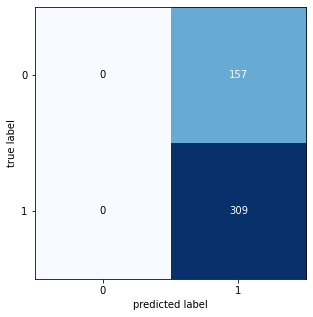

In [273]:
NB = GaussianNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)
print(classification_report(y_test, pred_NB))
print('accuracy:',NB.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [274]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

params={'n_estimators': [100,200,300,500],'learning_rate': [0.01,0.1,1],'max_depth':[3,4,5]}
gbm=GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbm, param_grid=params, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.7039234339415954
GradientBoostingClassifier(learning_rate=0.01)


c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.66      1.00      0.80       309

    accuracy                           0.66       466
   macro avg       0.33      0.50      0.40       466
weighted avg       0.44      0.66      0.53       466

accuracy: 0.6630901287553648
cross validation score: 0.6350720658888126


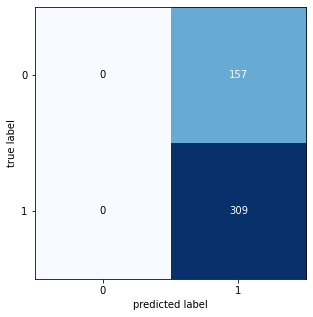

In [275]:
gboost = GradientBoostingClassifier(learning_rate=0.01)
gboost.fit(X_train, y_train)
pred_gboost = gboost.predict(X_test)
print(classification_report(y_test, pred_gboost))
print('accuracy:',gboost.score(X_test, y_test))
print('cross validation score:',cross_val_score(gboost, X_test, y_test, cv=5, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_gboost)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [289]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=29)


accuracy: 0.6609442060085837
cross validation score: 0.6565217391304348
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       157
           1       0.66      0.99      0.80       309

    accuracy                           0.66       466
   macro avg       0.50      0.50      0.40       466
weighted avg       0.55      0.66      0.53       466



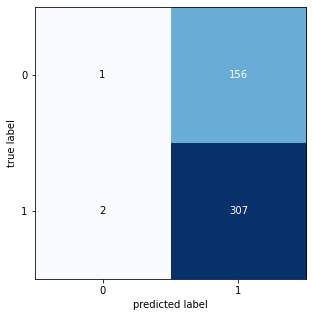

In [290]:
knn = KNeighborsClassifier(n_neighbors =29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('accuracy:',knn.score(X_test, y_test))
print('cross validation score:',cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy').mean())
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [343]:
df2=pd.read_csv('D:/intership-forage/task2/last1.csv')


In [344]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['gender'] = labelencoder.fit_transform(df2['gender'])
df2['job_industry_category'] = labelencoder.fit_transform(df2['job_industry_category'])
df2['wealth_segment'] = labelencoder.fit_transform(df2['wealth_segment'])
df2['past_3_years_bike_related_purchases'] = labelencoder.fit_transform(df2['past_3_years_bike_related_purchases'])
df2['owns_car'] = labelencoder.fit_transform(df2['owns_car'])
df2['state'] = labelencoder.fit_transform(df2['state'])
df2['property_valuation'] = labelencoder.fit_transform(df2['property_valuation'])

In [345]:
finalypred=random_forest.predict(df2) 

In [348]:
final=pd.read_excel('D:/intership-forage/task2/new_customer_list.xlsx')


In [349]:
submission = pd.concat([pd.DataFrame(final), pd.DataFrame(finalypred)], axis = 'columns')

In [350]:
submission.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,0
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.45,0.5625,0.703125,0.597656,1,1,1.718750,1
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.47,0.4700,0.587500,0.499375,1,1,1.718750,1
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.62,0.6200,0.620000,0.620000,1,1,1.718750,1
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.95,1.1875,1.187500,1.187500,4,4,1.703125,1
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.54,0.5400,0.675000,0.675000,4,4,1.703125,1


In [340]:
submission.rename(columns = {0:'Prediction'}, inplace = True) 

In [341]:
submission=submission[:][submission['Prediction']=="Best"]

In [352]:
submission.to_csv('final_results2.csv')